In [1]:
import os
import sys

os.chdir("../..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Import custom FFNN implementation
import os
import sys
# Add the parent directory to path to import your modules
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from lib.neural import NeuralNetwork, NetworkLayer
from lib.ffnn import FFNN
from lib.activation import ReLU, Sigmoid, Tanh, Linear, Softmax
from lib.loss import MSE, BCE, CCE
from lib.weight_initializer import ZeroInitializer, UniformInitializer, NormalInitializer


INFO:root:Loading data


Sparsity with L1 penalty: 80.52%
Test score with L1 penalty: 0.8325
Example run in 5.440 s


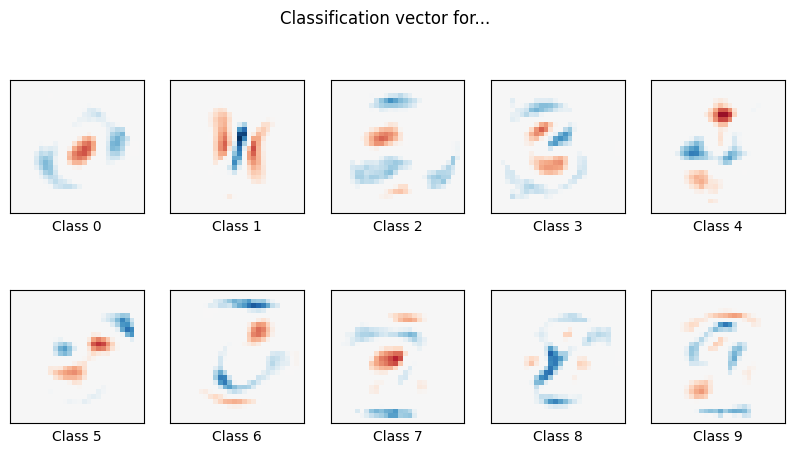

In [4]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import logging

logging.basicConfig(level=logging.INFO)

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
logging.info("Loading data")
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [5]:
# Preprocess data for FFNN
from sklearn.preprocessing import OneHotEncoder

# Load data (using your already loaded data)
# X_train and X_test are already loaded and scaled

# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train_ffnn, X_val, y_train_ffnn, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)



print(f"Training set: {X_train_ffnn.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")


Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


In [6]:
# Helper functions for evaluation and visualization
def evaluate_model(model, X, y_onehot):
    """Evaluate model accuracy on given data."""
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_onehot, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy

def plot_train_history(history, title="Training History"):
    """Plot training and validation loss history."""
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Training Loss')
    if 'val_loss' in history and history['val_loss']:
        plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [7]:
base_config = {
    'learning_rate': 0.32,
    'batch_size': 32,
    'epochs': 5,  
    'loss_function': CCE(),
    'activation': ReLU(),
    'initializer': NormalInitializer(seed=42)
}

Testing width variations...

Width Variation 1: [784, 32, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 570.53it/s, loss=5.0687]


Epoch 1/5 - 0.24s - loss: 5.0687 - val_loss: 2.9210


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 519.16it/s, loss=2.0629]


Epoch 2/5 - 0.26s - loss: 2.0629 - val_loss: 2.0128


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 894.71it/s, loss=1.3886]


Epoch 3/5 - 0.15s - loss: 1.3886 - val_loss: 1.5840


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 770.64it/s, loss=1.0918]


Epoch 4/5 - 0.18s - loss: 1.0918 - val_loss: 1.3612


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 703.71it/s, loss=0.9158]

Epoch 5/5 - 0.20s - loss: 0.9158 - val_loss: 1.2216


Test accuracy: 0.7195

Width Variation 2: [784, 128, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:02<00:00, 55.28it/s, loss=9.4301]


Epoch 1/5 - 2.29s - loss: 9.4301 - val_loss: 4.8596


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 106.59it/s, loss=3.1673]


Epoch 2/5 - 1.19s - loss: 3.1673 - val_loss: 3.1279


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 85.63it/s, loss=2.0319]


Epoch 3/5 - 1.48s - loss: 2.0319 - val_loss: 2.6965


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 71.74it/s, loss=1.4951]


Epoch 4/5 - 1.76s - loss: 1.4951 - val_loss: 2.4102


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 76.50it/s, loss=1.1620]


Epoch 5/5 - 1.67s - loss: 1.1620 - val_loss: 2.2603
Test accuracy: 0.7971

Width Variation 3: [784, 512, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 74.99it/s, loss=12.2957]


Epoch 1/5 - 1.70s - loss: 12.2957 - val_loss: 7.6987


Epoch 2/5: 100%|██████████| 125/125 [00:02<00:00, 49.48it/s, loss=5.1169]


Epoch 2/5 - 2.56s - loss: 5.1169 - val_loss: 5.5880


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 63.37it/s, loss=3.4041]


Epoch 3/5 - 2.01s - loss: 3.4041 - val_loss: 4.7665


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 71.40it/s, loss=2.6704]


Epoch 4/5 - 1.81s - loss: 2.6704 - val_loss: 4.3843


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 66.33it/s, loss=2.1796]
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Epoch 5/5 - 1.92s - loss: 2.1796 - val_loss: 4.1757
Test accuracy: 0.8195


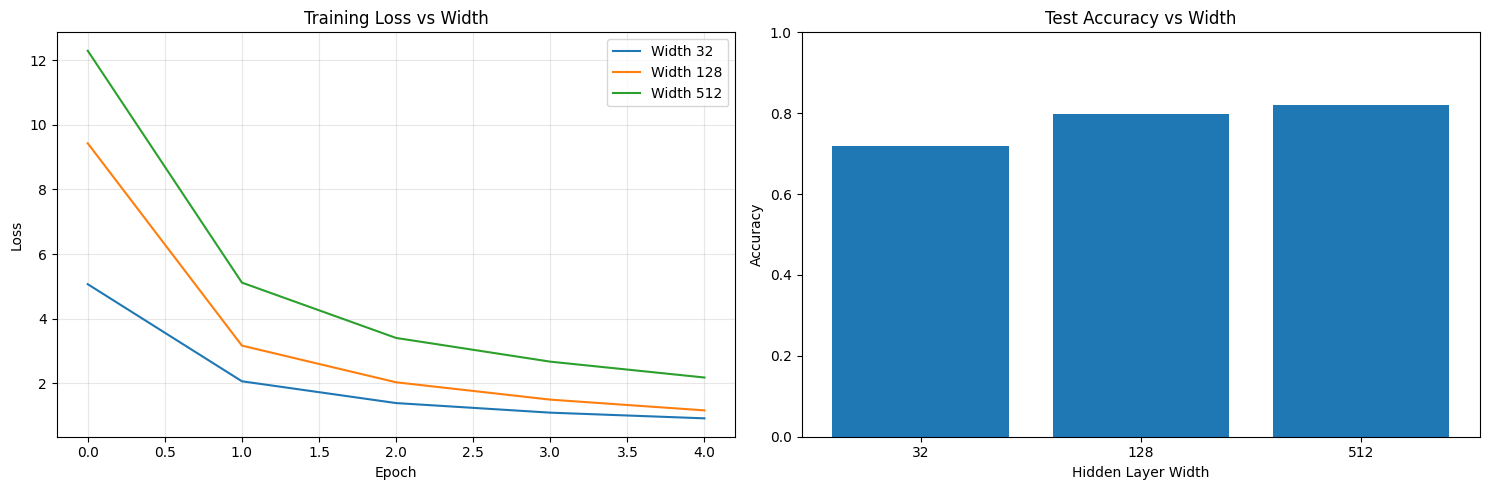


Testing depth variations...

Depth Variation 1: [784, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 233.44it/s, loss=6.2966]


Epoch 1/5 - 0.57s - loss: 6.2966 - val_loss: 3.4474


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 261.41it/s, loss=2.3303]


Epoch 2/5 - 0.51s - loss: 2.3303 - val_loss: 2.3245


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 283.01it/s, loss=1.5794]


Epoch 3/5 - 0.47s - loss: 1.5794 - val_loss: 1.9456


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 288.42it/s, loss=1.2319]


Epoch 4/5 - 0.45s - loss: 1.2319 - val_loss: 1.6804


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 193.00it/s, loss=1.0067]


Epoch 5/5 - 0.68s - loss: 1.0067 - val_loss: 1.5242
Test accuracy: 0.7831

Depth Variation 2: [784, 64, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 283.48it/s, loss=8.7846]


Epoch 1/5 - 0.47s - loss: 8.7846 - val_loss: 3.8604


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 273.09it/s, loss=2.6184]


Epoch 2/5 - 0.50s - loss: 2.6184 - val_loss: 2.6556


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 158.62it/s, loss=1.6383]


Epoch 3/5 - 0.80s - loss: 1.6383 - val_loss: 2.1658


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 334.53it/s, loss=1.1744]


Epoch 4/5 - 0.41s - loss: 1.1744 - val_loss: 1.9421


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 251.97it/s, loss=0.9010]


Epoch 5/5 - 0.52s - loss: 0.9010 - val_loss: 1.8173
Test accuracy: 0.7566

Depth Variation 3: [784, 64, 64, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 216.14it/s, loss=12.9156]


Epoch 1/5 - 0.63s - loss: 12.9156 - val_loss: 5.7404


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 247.40it/s, loss=3.8286]


Epoch 2/5 - 0.53s - loss: 3.8286 - val_loss: 3.6290


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 235.41it/s, loss=2.0690]


Epoch 3/5 - 0.59s - loss: 2.0690 - val_loss: 2.9201


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 223.71it/s, loss=1.4104]


Epoch 4/5 - 0.60s - loss: 1.4104 - val_loss: 2.5071


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 179.70it/s, loss=1.0125]
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Epoch 5/5 - 0.72s - loss: 1.0125 - val_loss: 2.2565
Test accuracy: 0.7287


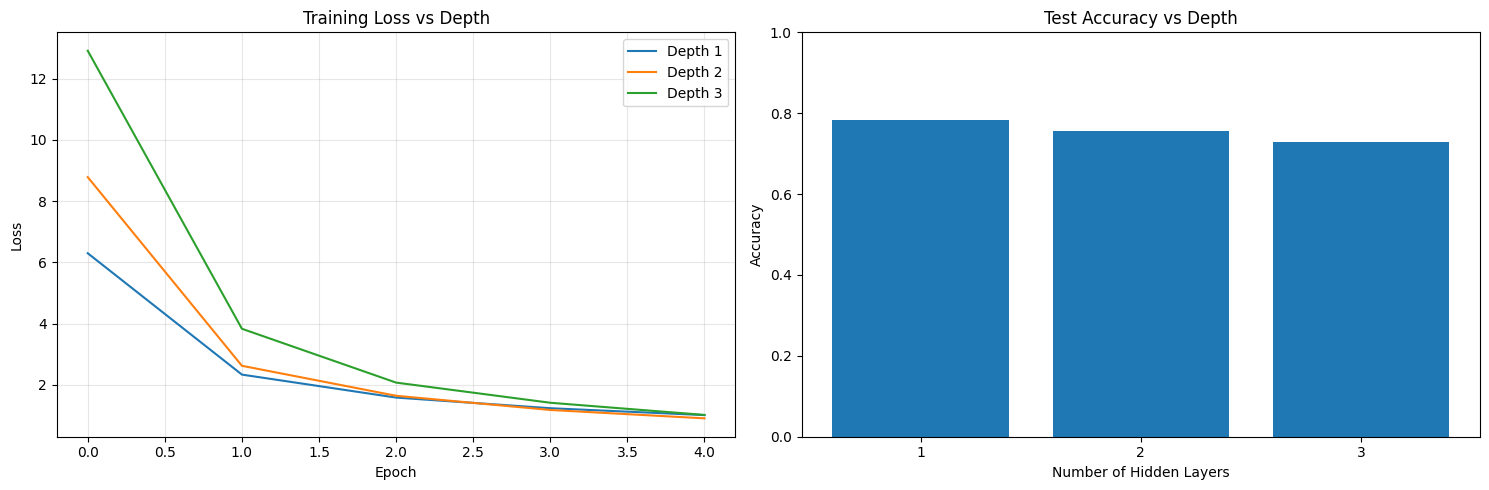

In [8]:


# Define different architectures for width variation (fixed depth)
width_variations = [
    [784, 32, 10],         # Narrow
    [784, 128, 10],        # Medium
    [784, 512, 10]         # Wide
]

# Define different architectures for depth variation (fixed width)
depth_variations = [
    [784, 64, 10],               # Shallow (1 hidden layer)
    [784, 64, 64, 10],           # Medium (2 hidden layers)
    [784, 64, 64, 64, 10]        # Deep (3 hidden layers)
]

# Test width variations
width_histories = []
width_accuracies = []

print("Testing width variations...")
for i, architecture in enumerate(width_variations):
    print(f"\nWidth Variation {i+1}: {architecture}")
    
    # Create activations list (output layer uses Softmax)
    activations = [base_config['activation']] * (len(architecture) - 2) + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_methods=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    width_histories.append(history)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    width_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot results for width variations
plt.figure(figsize=(15, 5))

# Plot width variation loss
plt.subplot(1, 2, 1)
for i, history in enumerate(width_histories):
    plt.plot(history['train_loss'], label=f"Width {width_variations[i][1]}")
plt.title('Training Loss vs Width')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare test accuracies for width
plt.subplot(1, 2, 2)
plt.bar([str(arch[1]) for arch in width_variations], width_accuracies)
plt.title('Test Accuracy vs Width')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Test depth variations
depth_histories = []
depth_accuracies = []

print("\nTesting depth variations...")
for i, architecture in enumerate(depth_variations):
    print(f"\nDepth Variation {i+1}: {architecture}")
    
    # Create activations list (output layer uses Softmax)
    activations = [base_config['activation']] * (len(architecture) - 2) + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_methods=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    depth_histories.append(history)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    depth_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot results for depth variations
plt.figure(figsize=(15, 5))

# Plot depth variation loss
plt.subplot(1, 2, 1)
for i, history in enumerate(depth_histories):
    plt.plot(history['train_loss'], label=f"Depth {len(depth_variations[i]) - 2}")
plt.title('Training Loss vs Depth')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare test accuracies for depth
plt.subplot(1, 2, 2)
plt.bar([str(len(arch) - 2) for arch in depth_variations], depth_accuracies)
plt.title('Test Accuracy vs Depth')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Testing activation functions...


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 138.81it/s, loss=10.6625]


Epoch 1/5 - 0.91s - loss: 10.6625 - val_loss: 5.7783


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 96.41it/s, loss=3.6858] 


Epoch 2/5 - 1.31s - loss: 3.6858 - val_loss: 4.1702


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 109.43it/s, loss=2.4887]


Epoch 3/5 - 1.16s - loss: 2.4887 - val_loss: 3.5675


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 114.64it/s, loss=2.0108]


Epoch 4/5 - 1.12s - loss: 2.0108 - val_loss: 3.2704


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 116.51it/s, loss=1.7595]


Epoch 5/5 - 1.10s - loss: 1.7595 - val_loss: 3.1204
Test accuracy: 0.8195


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 99.43it/s, loss=9.0724] 


Epoch 1/5 - 1.31s - loss: 9.0724 - val_loss: 4.6465


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 83.71it/s, loss=3.0713]


Epoch 2/5 - 1.51s - loss: 3.0713 - val_loss: 3.1336


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 75.41it/s, loss=2.0212]


Epoch 3/5 - 1.68s - loss: 2.0212 - val_loss: 2.6919


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 112.28it/s, loss=1.5040]


Epoch 4/5 - 1.13s - loss: 1.5040 - val_loss: 2.4256


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 83.18it/s, loss=1.1672] 


Epoch 5/5 - 1.52s - loss: 1.1672 - val_loss: 2.2739
Test accuracy: 0.7995


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 95.62it/s, loss=3.1161]


Epoch 1/5 - 1.38s - loss: 3.1161 - val_loss: 2.5932


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 85.59it/s, loss=2.2281] 


Epoch 2/5 - 1.47s - loss: 2.2281 - val_loss: 2.0765


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 80.42it/s, loss=1.7813]


Epoch 3/5 - 1.59s - loss: 1.7813 - val_loss: 1.7472


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 98.07it/s, loss=1.4865]


Epoch 4/5 - 1.29s - loss: 1.4865 - val_loss: 1.5261


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 87.18it/s, loss=1.2839]


Epoch 5/5 - 1.46s - loss: 1.2839 - val_loss: 1.3669
Test accuracy: 0.5704


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 81.02it/s, loss=4.1056]


Epoch 1/5 - 1.55s - loss: 4.1056 - val_loss: 3.1018


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 81.04it/s, loss=2.2683]


Epoch 2/5 - 1.56s - loss: 2.2683 - val_loss: 2.1906


Epoch 3/5: 100%|██████████| 125/125 [00:02<00:00, 59.53it/s, loss=1.5689]


Epoch 3/5 - 2.12s - loss: 1.5689 - val_loss: 1.7858


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 79.93it/s, loss=1.2248]


Epoch 4/5 - 1.58s - loss: 1.2248 - val_loss: 1.5581


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 88.32it/s, loss=1.0195]


Epoch 5/5 - 1.44s - loss: 1.0195 - val_loss: 1.4115
Test accuracy: 0.6513


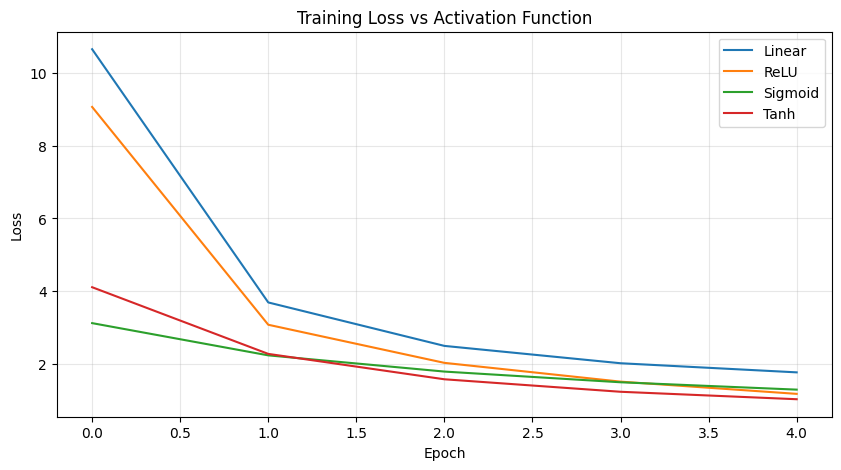

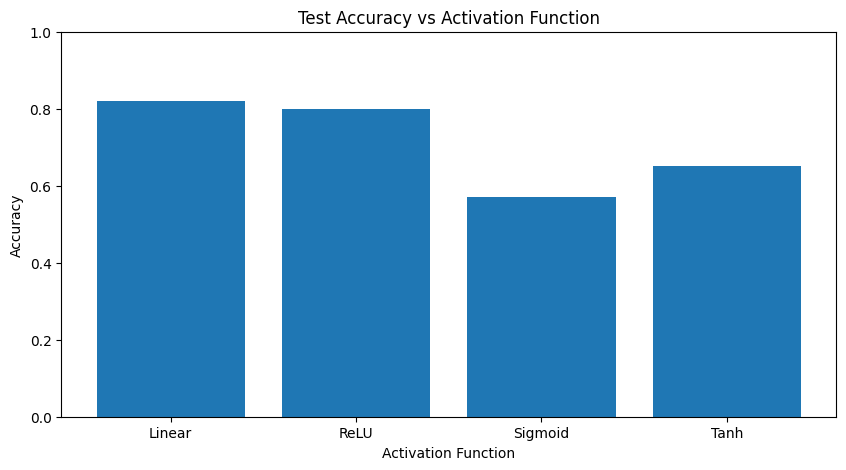

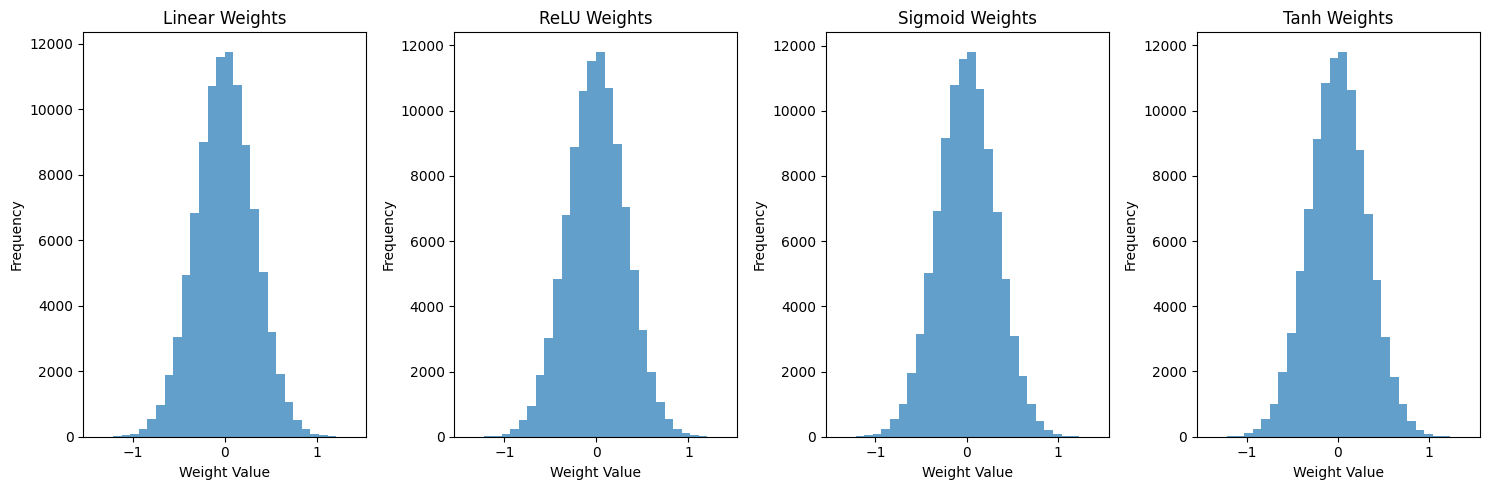

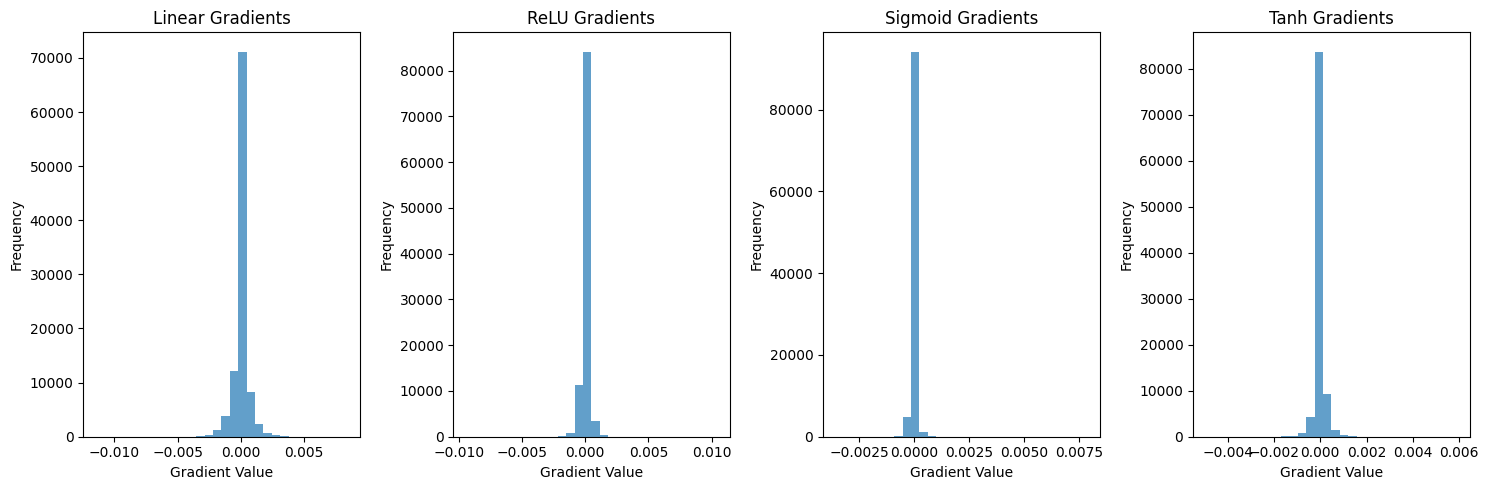

In [11]:
# Define base architecture
architecture = [784, 128, 10]

# Define activation functions to test (for hidden layers)
activation_functions = [Linear(), ReLU(), Sigmoid(), Tanh()]

# Test different activation functions
activation_histories = []
activation_accuracies = []
activation_models = []

print("Testing activation functions...")
for activation in activation_functions:
    # print(f"\nActivation: {activation.__class__.__name__}")
    
    # Create activations list (output layer uses Softmax)
    activations = [activation] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_methods=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    activation_histories.append(history)
    activation_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    activation_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(activation_histories):
    plt.plot(history['train_loss'], label=f"{activation_functions[i].__class__.__name__}")
plt.title('Training Loss vs Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar([act.__class__.__name__ for act in activation_functions], activation_accuracies)
plt.title('Test Accuracy vs Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(activation_models):
    plt.subplot(1, len(activation_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"{activation_functions[i].__class__.__name__} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot gradient distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(activation_models):
    plt.subplot(1, len(activation_models), i+1)
    gradients = model.network.gradients[0].flatten()
    plt.hist(gradients, bins=30, alpha=0.7)
    plt.title(f"{activation_functions[i].__class__.__name__} Gradients")
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Testing learning rates...

Learning Rate: 0.001


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 120.13it/s, loss=22.8684]


Epoch 1/5 - 1.05s - loss: 22.8684 - val_loss: 23.0501


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 85.23it/s, loss=22.6392]


Epoch 2/5 - 1.48s - loss: 22.6392 - val_loss: 22.8259


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 128.90it/s, loss=22.4140]


Epoch 3/5 - 0.98s - loss: 22.4140 - val_loss: 22.6038


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 86.53it/s, loss=22.1915]


Epoch 4/5 - 1.46s - loss: 22.1915 - val_loss: 22.3858


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 128.34it/s, loss=21.9729]


Epoch 5/5 - 1.02s - loss: 21.9729 - val_loss: 22.1698
Test accuracy: 0.1015

Learning Rate: 0.01


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 92.56it/s, loss=21.9014] 


Epoch 1/5 - 1.36s - loss: 21.9014 - val_loss: 21.1203


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 95.38it/s, loss=19.7949]


Epoch 2/5 - 1.34s - loss: 19.7949 - val_loss: 19.1940


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 86.66it/s, loss=17.8578]


Epoch 3/5 - 1.47s - loss: 17.8578 - val_loss: 17.4862


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 95.53it/s, loss=16.1995] 


Epoch 4/5 - 1.33s - loss: 16.1995 - val_loss: 16.0322


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 90.92it/s, loss=14.7875]


Epoch 5/5 - 1.39s - loss: 14.7875 - val_loss: 14.7659
Test accuracy: 0.2442

Learning Rate: 0.1


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 111.36it/s, loss=15.0313]


Epoch 1/5 - 1.14s - loss: 15.0313 - val_loss: 10.1031


Epoch 2/5: 100%|██████████| 125/125 [00:02<00:00, 61.34it/s, loss=7.3349]


Epoch 2/5 - 2.06s - loss: 7.3349 - val_loss: 6.4016


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 85.09it/s, loss=4.7682]


Epoch 3/5 - 1.49s - loss: 4.7682 - val_loss: 4.8771


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 69.55it/s, loss=3.6002]


Epoch 4/5 - 1.82s - loss: 3.6002 - val_loss: 4.0815


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 103.86it/s, loss=2.9160]


Epoch 5/5 - 1.21s - loss: 2.9160 - val_loss: 3.5876
Test accuracy: 0.6986

Learning Rate: 0.32


Epoch 1/5: 100%|██████████| 125/125 [00:02<00:00, 55.34it/s, loss=9.1920]


Epoch 1/5 - 2.28s - loss: 9.1920 - val_loss: 4.6973


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 67.97it/s, loss=3.1210]


Epoch 2/5 - 1.85s - loss: 3.1210 - val_loss: 3.1105


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 67.40it/s, loss=2.0132]


Epoch 3/5 - 1.88s - loss: 2.0132 - val_loss: 2.6406


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 75.43it/s, loss=1.5251]


Epoch 4/5 - 1.69s - loss: 1.5251 - val_loss: 2.4655


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 108.71it/s, loss=1.2194]


Epoch 5/5 - 1.17s - loss: 1.2194 - val_loss: 2.2836
Test accuracy: 0.7940

Learning Rate: 0.5


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 86.77it/s, loss=7.4302]


Epoch 1/5 - 1.46s - loss: 7.4302 - val_loss: 3.5105


Epoch 2/5: 100%|██████████| 125/125 [00:02<00:00, 44.02it/s, loss=2.3154]


Epoch 2/5 - 2.87s - loss: 2.3154 - val_loss: 2.5893


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 72.99it/s, loss=1.4773]


Epoch 3/5 - 1.73s - loss: 1.4773 - val_loss: 2.3301


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 75.44it/s, loss=1.0681]


Epoch 4/5 - 1.67s - loss: 1.0681 - val_loss: 2.1376


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 65.86it/s, loss=0.8246]


Epoch 5/5 - 1.93s - loss: 0.8246 - val_loss: 2.0013
Test accuracy: 0.8177

Learning Rate: 1


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 73.59it/s, loss=5.3800]


Epoch 1/5 - 1.72s - loss: 5.3800 - val_loss: 2.8358


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 99.22it/s, loss=1.6252] 


Epoch 2/5 - 1.28s - loss: 1.6252 - val_loss: 2.1516


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 74.78it/s, loss=0.9716]


Epoch 3/5 - 1.70s - loss: 0.9716 - val_loss: 2.0026


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 75.27it/s, loss=0.6630]


Epoch 4/5 - 1.72s - loss: 0.6630 - val_loss: 1.7788


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 74.41it/s, loss=0.4720]


Epoch 5/5 - 1.70s - loss: 0.4720 - val_loss: 1.7157
Test accuracy: 0.8385


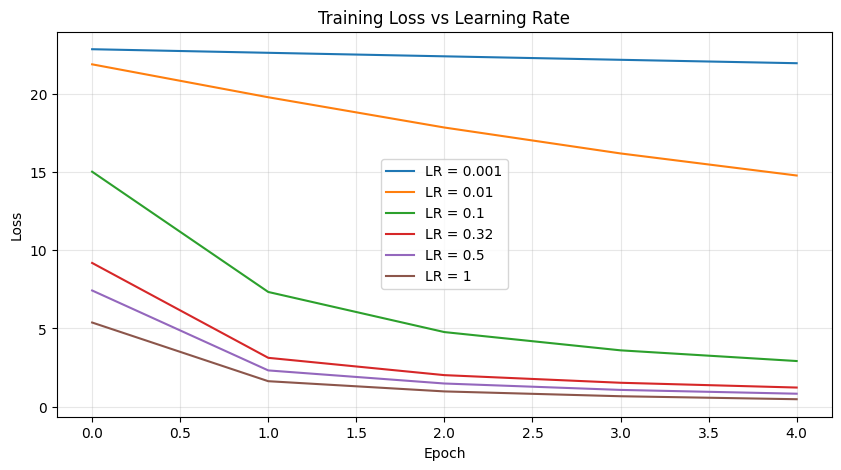

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


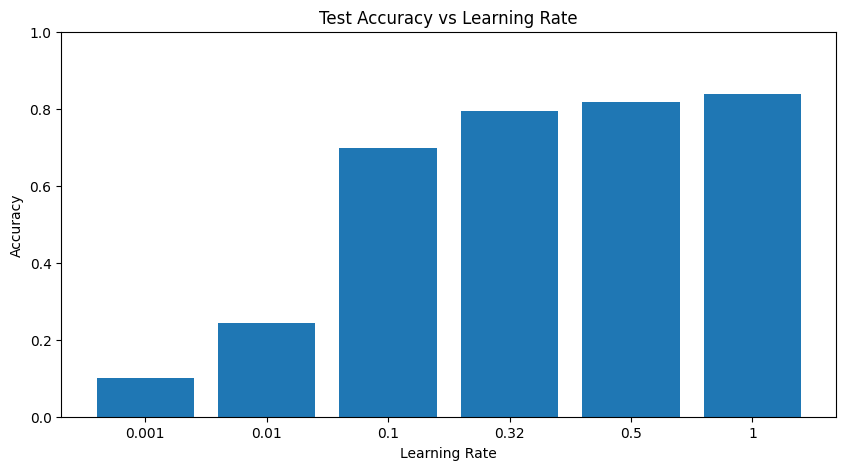

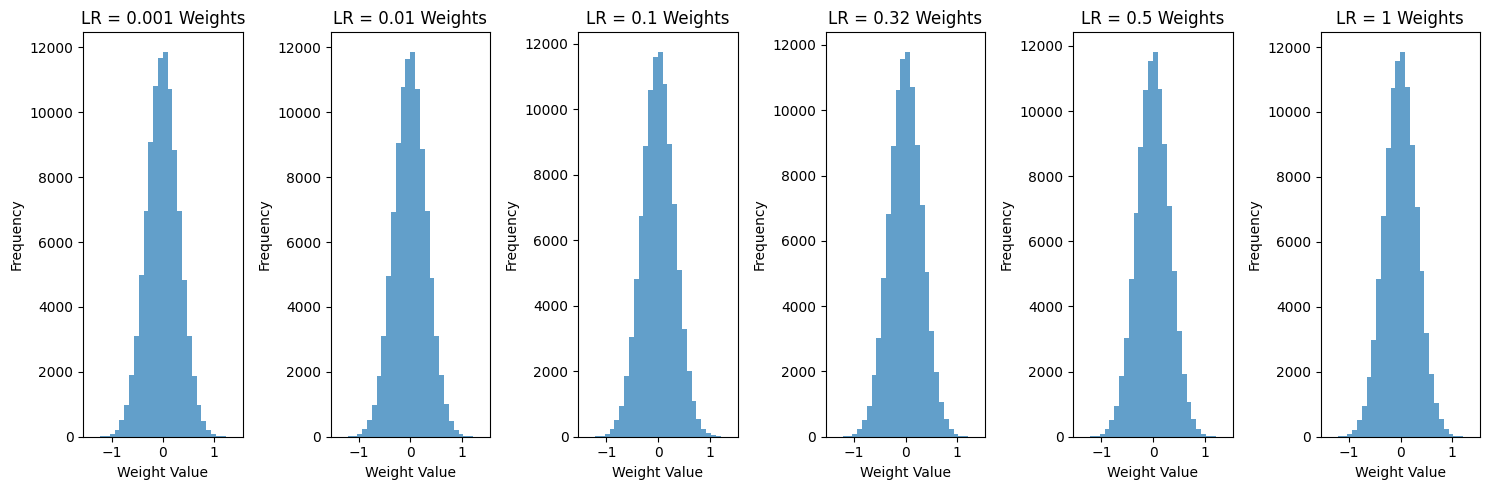

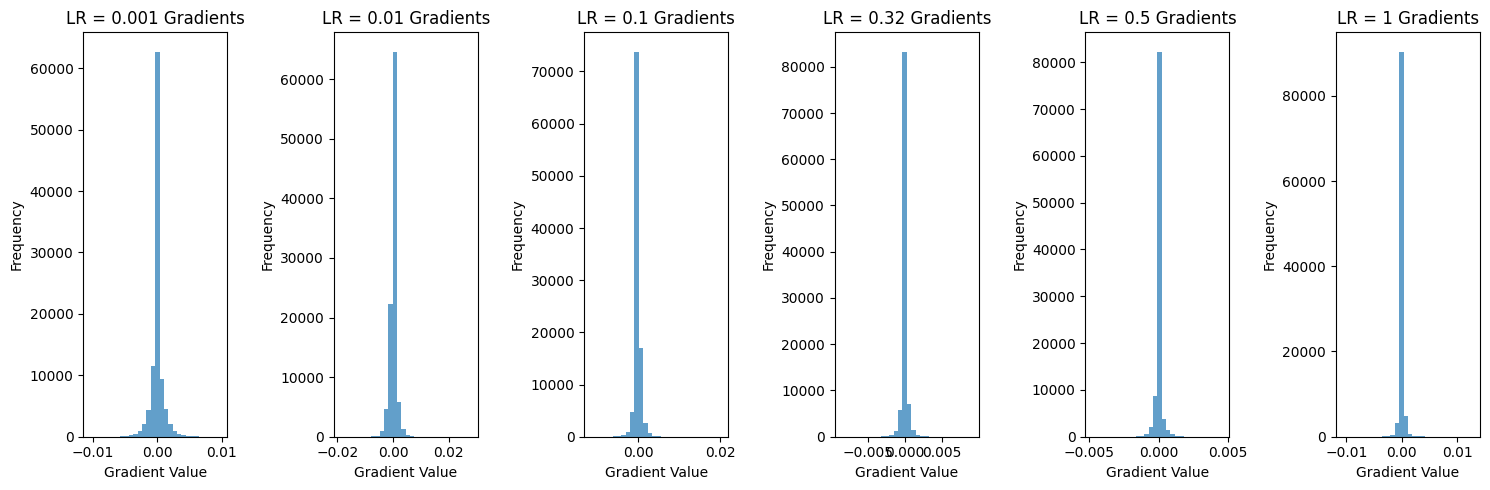

In [13]:
# Define base architecture
architecture = [784, 128, 10]

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.32, 0.5, 1]

# Test different learning rates
lr_histories = []
lr_accuracies = []
lr_models = []

print("Testing learning rates...")
for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    
    # Create activations list (output layer uses Softmax)
    activations = [ReLU()] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_methods=base_config['initializer']
    )
    
    # Create FFNN model
    # model = FFNN(network, learning_rate=lr)
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=lr,
        verbose=1
    )
    
    # Store results
    lr_histories.append(history)
    lr_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    lr_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(lr_histories):
    plt.plot(history['train_loss'], label=f"LR = {learning_rates[i]}")
plt.title('Training Loss vs Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar([str(lr) for lr in learning_rates], lr_accuracies)
plt.title('Test Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(lr_models):
    plt.subplot(1, len(lr_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"LR = {learning_rates[i]} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot gradient distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(lr_models):
    plt.subplot(1, len(lr_models), i+1)
    gradients = model.network.gradients[0].flatten()
    plt.hist(gradients, bins=30, alpha=0.7)
    plt.title(f"LR = {learning_rates[i]} Gradients")
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Testing weight initializers...

Initializer: Zero


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 97.07it/s, loss=2.3024] 


Epoch 1/5 - 1.30s - loss: 2.3024 - val_loss: 2.3021


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 98.51it/s, loss=2.3018] 


Epoch 2/5 - 1.29s - loss: 2.3018 - val_loss: 2.3017


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 138.81it/s, loss=2.3013]


Epoch 3/5 - 0.91s - loss: 2.3013 - val_loss: 2.3014


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 86.71it/s, loss=2.3009] 


Epoch 4/5 - 1.45s - loss: 2.3009 - val_loss: 2.3012


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 96.32it/s, loss=2.3007]


Epoch 5/5 - 1.31s - loss: 2.3007 - val_loss: 2.3010
Test accuracy: 0.1129

Initializer: Uniform


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 81.23it/s, loss=1.5602]


Epoch 1/5 - 1.56s - loss: 1.5602 - val_loss: 1.1163


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 63.98it/s, loss=0.8144]


Epoch 2/5 - 1.98s - loss: 0.8144 - val_loss: 0.7773


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 71.56it/s, loss=0.5720]


Epoch 3/5 - 1.77s - loss: 0.5720 - val_loss: 0.6407


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 91.24it/s, loss=0.4559]


Epoch 4/5 - 1.39s - loss: 0.4559 - val_loss: 0.5678


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 67.59it/s, loss=0.3869]


Epoch 5/5 - 1.87s - loss: 0.3869 - val_loss: 0.5219
Test accuracy: 0.8669

Initializer: Normal


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 63.39it/s, loss=9.1967]


Epoch 1/5 - 1.99s - loss: 9.1967 - val_loss: 4.7806


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 66.61it/s, loss=3.0558]


Epoch 2/5 - 1.91s - loss: 3.0558 - val_loss: 3.1115


Epoch 3/5: 100%|██████████| 125/125 [00:02<00:00, 54.87it/s, loss=1.9537]


Epoch 3/5 - 2.30s - loss: 1.9537 - val_loss: 2.6644


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 86.63it/s, loss=1.4529]


Epoch 4/5 - 1.48s - loss: 1.4529 - val_loss: 2.4347


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 70.67it/s, loss=1.1633]


Epoch 5/5 - 1.78s - loss: 1.1633 - val_loss: 2.2269
Test accuracy: 0.7983


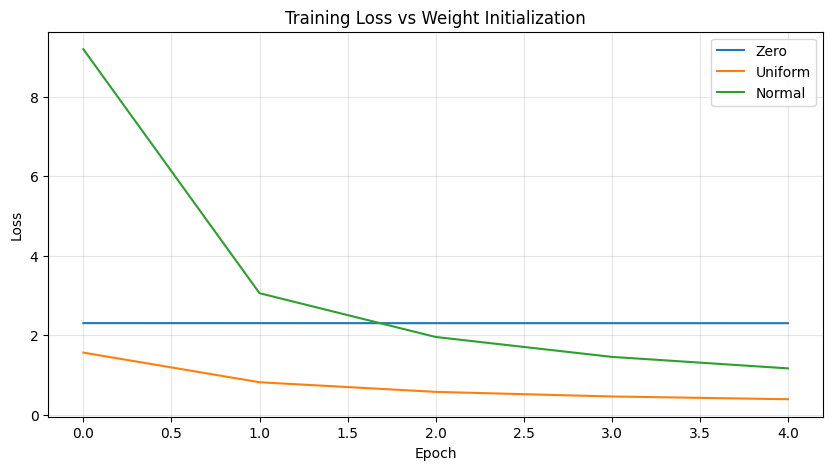

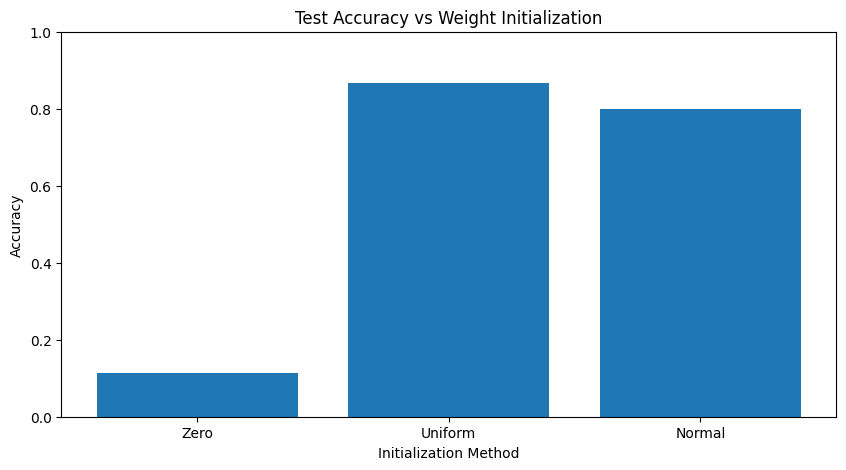

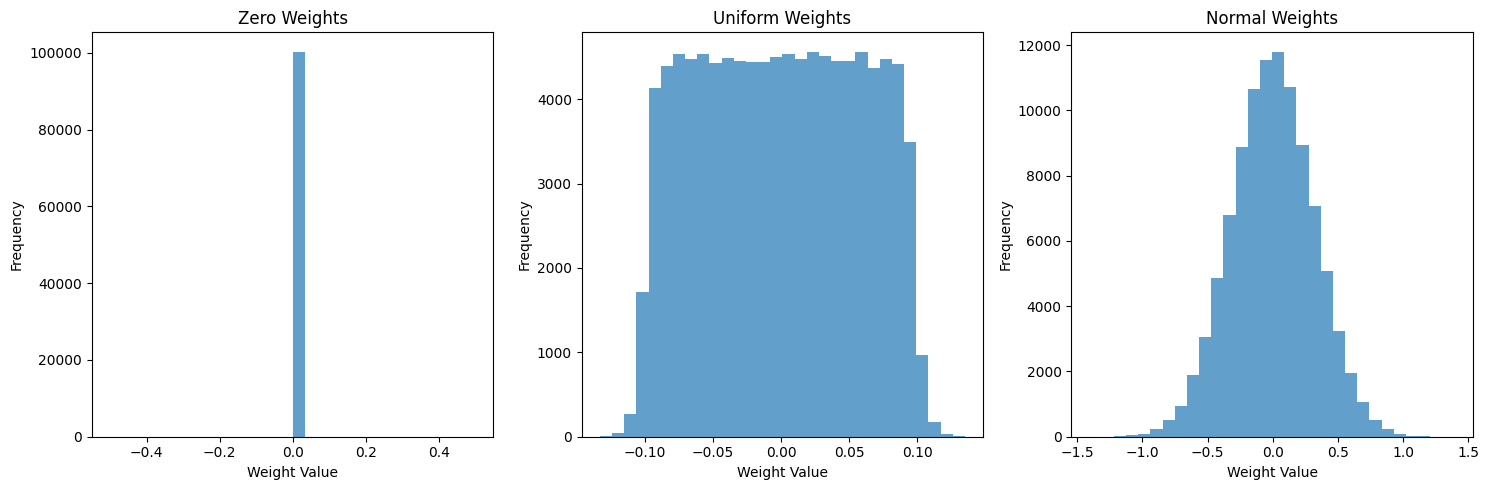

In [14]:
# Define base architecture
architecture = [784, 128, 10]

# Define initializers to test
initializers = [
    ZeroInitializer(),
    UniformInitializer(low=-0.1, high=0.1, seed=42),
    NormalInitializer(mean=0, var=0.1, seed=42)
]
initializer_names = ["Zero", "Uniform", "Normal"]

# Test different initializers
init_histories = []
init_accuracies = []
init_models = []

print("Testing weight initializers...")
for i, initializer in enumerate(initializers):
    print(f"\nInitializer: {initializer_names[i]}")
    
    # Create activations list (output layer uses Softmax)
    activations = [ReLU()] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_methods=initializer
    )
    
    # Create FFNN model
    # model = FFNN(network, learning_rate=base_config['learning_rate'])
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        verbose=1, learning_rate=base_config['learning_rate']
    )
    
    # Store results
    init_histories.append(history)
    init_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    init_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(init_histories):
    plt.plot(history['train_loss'], label=f"{initializer_names[i]}")
plt.title('Training Loss vs Weight Initialization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar(initializer_names, init_accuracies)
plt.title('Test Accuracy vs Weight Initialization')
plt.xlabel('Initialization Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot initial weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(init_models):
    plt.subplot(1, len(init_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"{initializer_names[i]} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Training custom FFNN model...


Epoch 1/5:   0%|          | 0/125 [00:00<?, ?it/s, loss=0.6388]

Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 95.46it/s, loss=9.1099] 


Epoch 1/5 - 1.32s - loss: 9.1099 - val_loss: 4.6449


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 75.76it/s, loss=3.0778]


Epoch 2/5 - 1.68s - loss: 3.0778 - val_loss: 3.0756


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 79.58it/s, loss=1.9984]


Epoch 3/5 - 1.59s - loss: 1.9984 - val_loss: 2.5988


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 93.73it/s, loss=1.4976]


Epoch 4/5 - 1.35s - loss: 1.4976 - val_loss: 2.3706


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 78.89it/s, loss=1.1738]


Epoch 5/5 - 1.60s - loss: 1.1738 - val_loss: 2.2784

Training sklearn MLPClassifier...
First few training labels: [9 7 2 4 7]
Label type: <class 'numpy.ndarray'> int64
Iteration 1, loss = 413799562241003328.00000000
Iteration 2, loss = 44889865900056755484015474864059911766016.00000000
Iteration 3, loss = 272055763106684684055834822370111464381079525022660999736459264.00000000
Iteration 4, loss = 4539119762754433695383860448800718069187891057581365662663674608976557424833885896704.00000000
Iteration 5, loss = 9963701686337180268139853176257776271055623831669660995746902926937312667235532901634568528609296466837504.00000000

Model Comparison:
Custom FFNN accuracy: 0.7999
sklearn MLP accuracy: 0.2080


/home/ganadipa/code/kuliah/sem6/Machine-learning/tubes-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


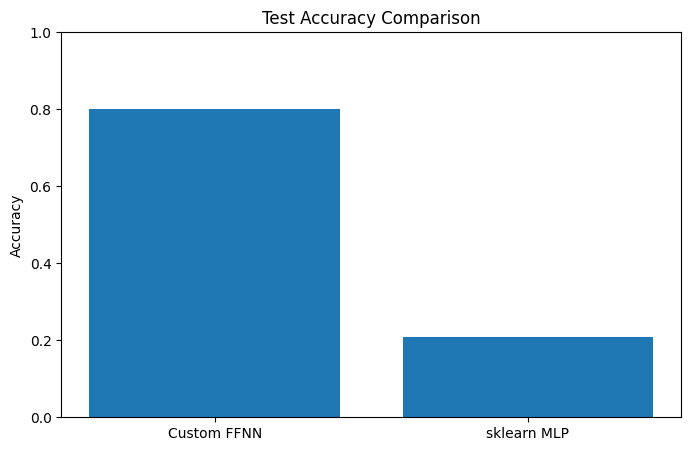

In [15]:
# Import sklearn's MLPClassifier
from sklearn.neural_network import MLPClassifier

# Define architecture and parameters
architecture = [784, 128, 10]
learning_rate = 0.32
batch_size = 32
epochs = 5

# Create our custom FFNN
activations = [ReLU()] + [Softmax()]
network = NeuralNetwork(
    node_counts=architecture,
    activations=activations,
    loss_function=CCE(),
    initialize_methods=NormalInitializer(seed=42)
)
custom_model = FFNN(network)

# Train our custom model
print("Training custom FFNN model...")
custom_history = custom_model.fit(
    X_train_ffnn, y_train_ffnn,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    learning_rate=learning_rate,
    verbose=1
)

# Create sklearn MLPClassifier
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='sgd',
    alpha=0.0001,
    batch_size=batch_size,
    learning_rate_init=learning_rate,
    max_iter=epochs,
    random_state=42,
    verbose=True
)

# Train sklearn model with correct target format
print("\nTraining sklearn MLPClassifier...")
# Convert string labels to integers if needed
y_train_int = np.array(y_train).astype(int) if isinstance(y_train[0], str) else np.array(y_train, dtype=int)
y_test_int = np.array(y_test).astype(int) if isinstance(y_test[0], str) else np.array(y_test, dtype=int)

# Check first few labels to debug
print(f"First few training labels: {y_train_int[:5]}")
print(f"Label type: {type(y_train_int)} {y_train_int.dtype}")

# Fit the model
sklearn_model.fit(X_train, y_train_int)

# Evaluate both models
custom_accuracy = evaluate_model(custom_model, X_test, y_test_onehot)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = np.mean(sklearn_predictions == y_test_int)

print("\nModel Comparison:")
print(f"Custom FFNN accuracy: {custom_accuracy:.4f}")
print(f"sklearn MLP accuracy: {sklearn_accuracy:.4f}")

# Compare accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Custom FFNN', 'sklearn MLP'], [custom_accuracy, sklearn_accuracy])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()